## 차원축소

- 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것
- 차원이 증가할 수록 데이터 포인트 간의 거리가 기하급수적으로 멀어지게 되고 희소한 구조를 가지며 예측 신뢰도가 떨어짐
- 선형 모델에서는 입력 변수 간의 상관관계가 높을 경우 다중 공선성 문제로 모델의 예측 성능 저하
- 다차원의 피처를 차원 축소해 피처 수를 줄이면 더 직관적으로 데이터를 해석할 수 있음
- 차원축소는 피처 선택과 피처 추출로 나눌 수 있음
- 피처 선택은 특정 피처에 종속성이 강한 불필요한 피처는 제거하고 데이터의 특징을 잘 나타내는 주요 피처만 선택
- 피처 추출은 기존 피처를 저차원의 중요 피처로 압축해서 추출, 기존의 피처가 압축된 것 이므로 기존 피처와는 다른 값이 됨
- 차원 축소를 통해 좀 더 데이터를 잘 설명할 수 있는 잠재적인 요소를 추출하며, PCA, SVD, NMF 는 대표적인 차원 축소 알고리즘

## LDA ( Linear Discriminant Analysis )
- PCA와 매우 유사한 방식이며 PCA가 입력 데이터 변동성의 가장 큰 축을 찾는데에 반해 LDA는 입력 데이터의 결정 값 클래스를
  최대한 분리할 수 있는 축을 찾는 방식으로 축소
 
 
## SVD, NMF
- 매우 많은 피쳐 데이터를 가진 고차원 행렬을 두 개의 저차원 행렬로 분리하는 행렬 분해 기법
- 행렬 분해를 수행하면서 원본 행렬에서 잠재된 요소를 추출하기 때문에 토픽 모델이나 추천 시스템에서 활발하게 사용

In [10]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris.keys()
columns = ['sepal_length','sepal_width','petal_length','petal_width']
iris_df = pd.DataFrame(iris.data, columns = columns)
iris_df['target'] = iris.target

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


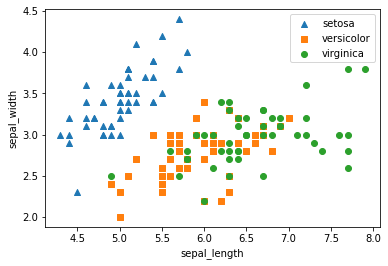

In [10]:
markers = ['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data = iris_df[iris_df.target==i]['sepal_length']
    y_axis_data = iris_df[iris_df.target==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    plt.legend()
    plt.xlabel('sepal_length')
    plt.ylabel('sepal_width')

In [12]:
iris_df1 = iris_df.drop('target',axis=1)

In [13]:
# PCA로 4개 속석을 2개로 압축
# StandardSclaer를 이용 평균 0, 표준편차 1인 표준정규분포로 모든 속성 값을 변환

from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(iris_df1)
iris_scaled.shape

(150, 4)

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

iris_pca = pca.fit_transform(iris_scaled)

iris_pca.shape

(150, 2)

In [15]:
pca_columns = ['pca_component_1','pca_component_2']
df_iris_pca = pd.DataFrame(iris_pca, columns = pca_columns)
df_iris_pca['target'] = iris.target

df_iris_pca.head()

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


In [11]:
pca_columns = ['pca_component_1','pca_component_2']
df_iris_pca = pd.DataFrame(iris_pca, columns=pca_columns)
df_iris_pca['target'] = iris.target
df_iris_pca.head()

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


Text(0, 0.5, 'pca_component_2')

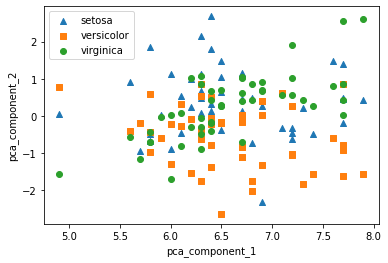

In [12]:
markers = ['^','s','o']
for i , marker in enumerate(markers):
    x_aixs_data = df_iris_pca[df_iris_pca.target==i]['pca_component_1']
    y_axis_data = df_iris_pca[df_iris_pca.target==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')

Text(0, 0.5, 'pca_component_2')

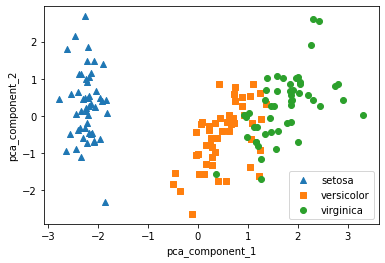

In [13]:
markers= ['^','s','o']
for i, marker in enumerate(markers):
    x_axis_data = df_iris_pca[df_iris_pca.target == i]['pca_component_1']
    y_axis_data = df_iris_pca[df_iris_pca.target == i]['pca_component_2']
    plt.scatter(x_axis_data,y_axis_data, marker=marker, label=iris.target_names[i])
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')

In [ ]:
# PCA 객체의 explained_variance_ratio_ 속성은 전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율을 제공.
pca.explained_variance_ratio_

In [ ]:
# 기존 데이터로 분류 모델링 및 평가 (교차검증, cv =3 , 평가지표 = accuracy)

from sklearn.model_selction import cross_val_score

pc